In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from numpy import pi
from numpy.fft import fft, fftfreq



Text(0, 0.5, 'signal, arb.units')

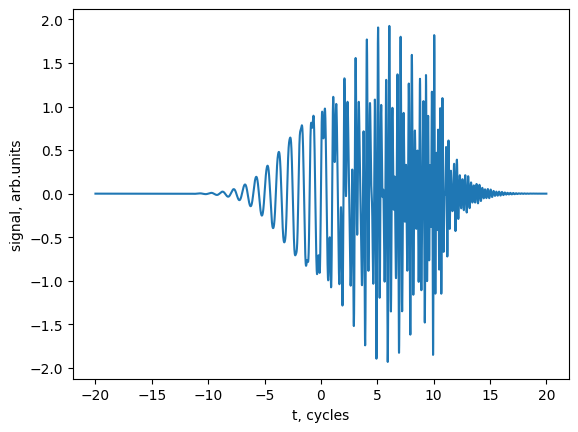

In [9]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
# Add 4th wave packet: frequency = 4, time_shift = 7 cycles
y=y+np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/20**2)

plt.plot(t/2/pi,y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

Text(0.5, 1.0, 'FFT Power Spectrum (showing 4 wave packets)')

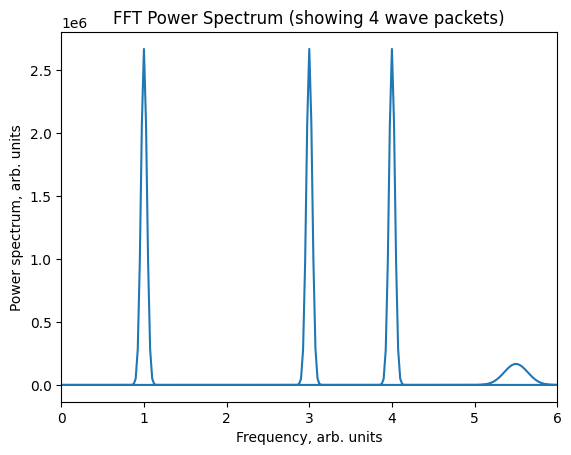

In [10]:
# Fourier spectrum
sp=fft(y)
w=fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, np.abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.title('FFT Power Spectrum (showing 4 wave packets)')
# Note: The 4th wave packet (frequency=4) adds a peak at frequency ~4

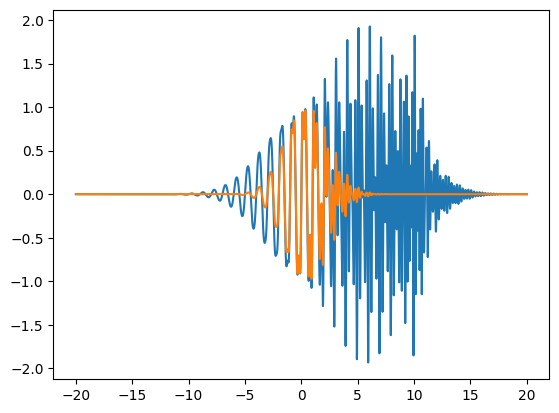

In [11]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=np.exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plt.plot(t/2/pi, y)
plt.plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [ ]:
def get_specgram(nwindowsteps=1000):

    window_width = 2.0 * 2 * pi
    
    window_positions = np.linspace(t.min(), t.max(), nwindowsteps)
    
    dt = t[1] - t[0]
    frequencies = fftfreq(len(t), d=dt/2/pi)
    nfreq = len(frequencies) // 2
    frequencies = frequencies[:nfreq]
    
    specgram = np.zeros((nfreq, nwindowsteps))
    
    for i, window_pos in enumerate(window_positions):
        window_function = np.exp(-(t - window_pos)**2 / 2 / window_width**2)
        
        y_window = y * window_function
        
        sp = fft(y_window)
        
        specgram[:, i] = np.abs(sp[:nfreq])**2
    
    return specgram, window_positions, frequencies

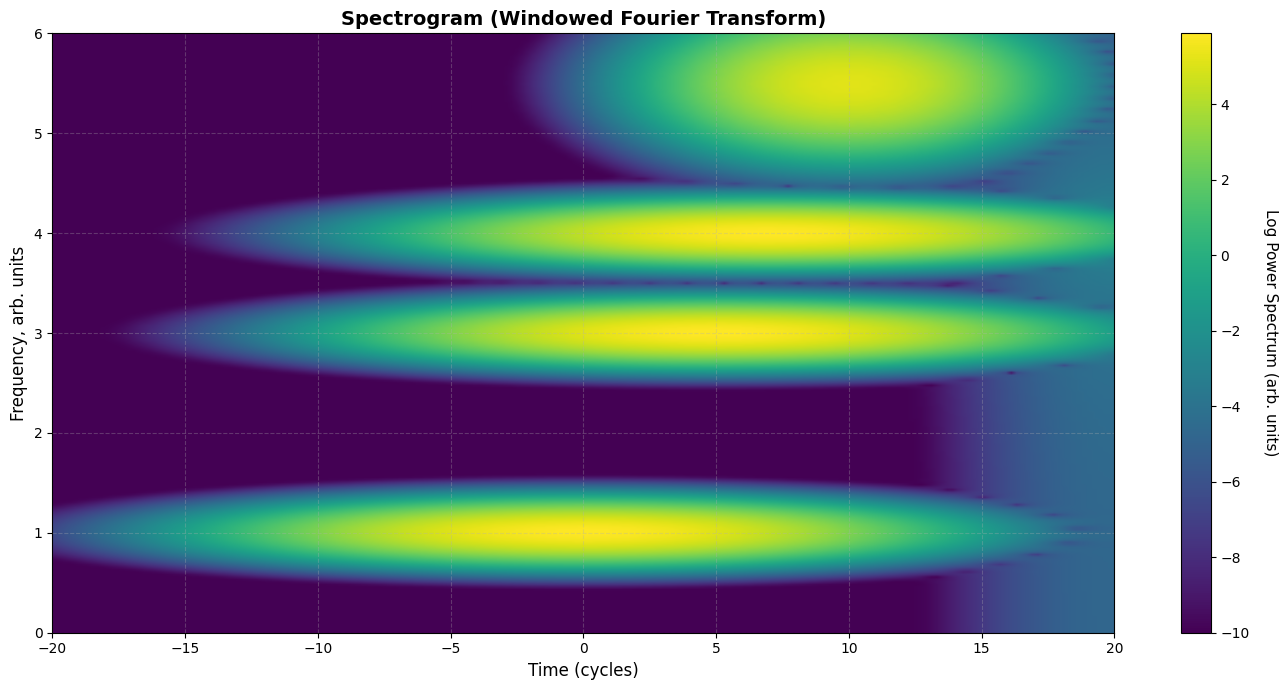

In [ ]:
specgram, window_positions, frequencies = get_specgram(nwindowsteps=200)

freq_mask = (frequencies >= 0) & (frequencies <= 6)
frequencies_limited = frequencies[freq_mask]
specgram_limited = specgram[freq_mask, :]

fig, ax = plt.subplots(figsize=(14, 7))

specgram_log = np.log10(specgram_limited + 1e-10)  # Add small value to avoid log(0)

im = ax.imshow(specgram_log, aspect='auto', origin='lower', 
               extent=[window_positions.min()/2/pi, window_positions.max()/2/pi,
                       frequencies_limited.min(), frequencies_limited.max()],
               cmap='viridis', interpolation='bilinear')
ax.set_xlabel('Time (cycles)', fontsize=12)
ax.set_ylabel('Frequency, arb. units', fontsize=12)
ax.set_title('Spectrogram (Windowed Fourier Transform)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 6) 
ax.grid(True, alpha=0.3, linestyle='--')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Log Power Spectrum (arb. units)', fontsize=11, rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


In [19]:
import time

# Test with power of 2
n1 = 2**14
t1 = np.linspace(-20*2*pi, 20*2*pi, n1)
y1 = np.sin(t1)*np.exp(-t1**2/2/20**2)
y1 = y1 + np.sin(3*t1)*np.exp(-(t1-5*2*pi)**2/2/20**2)
y1 = y1 + np.sin(5.5*t1)*np.exp(-(t1-10*2*pi)**2/2/5**2)
y1 = y1 + np.sin(4*t1)*np.exp(-(t1-7*2*pi)**2/2/20**2)

# Test with power of 2 + 5
n2 = 2**14 + 5
t2 = np.linspace(-20*2*pi, 20*2*pi, n2)
y2 = np.sin(t2)*np.exp(-t2**2/2/20**2)
y2 = y2 + np.sin(3*t2)*np.exp(-(t2-5*2*pi)**2/2/20**2)
y2 = y2 + np.sin(5.5*t2)*np.exp(-(t2-10*2*pi)**2/2/5**2)
y2 = y2 + np.sin(4*t2)*np.exp(-(t2-7*2*pi)**2/2/20**2)

# Test with power of 2 - 5
n3 = 2**14 - 5
t3 = np.linspace(-20*2*pi, 20*2*pi, n3)
y3 = np.sin(t3)*np.exp(-t3**2/2/20**2)
y3 = y3 + np.sin(3*t3)*np.exp(-(t3-5*2*pi)**2/2/20**2)
y3 = y3 + np.sin(5.5*t3)*np.exp(-(t3-10*2*pi)**2/2/5**2)
y3 = y3 + np.sin(4*t3)*np.exp(-(t3-7*2*pi)**2/2/20**2)

# Measure FFT timing for power of 2
start = time.time()
sp1 = fft(y1)
time1 = time.time() - start

# Measure FFT timing for power of 2 + 5
start = time.time()
sp2 = fft(y2)
time2 = time.time() - start

# Measure FFT timing for power of 2 - 5
start = time.time()
sp3 = fft(y3)
time3 = time.time() - start

print(f"Array size: {n1} (2^14), FFT time: {time1*1000:.4f} ms")
print(f"Array size: {n2} (2^14 + 5), FFT time: {time2*1000:.4f} ms")
print(f"Array size: {n3} (2^14 - 5), FFT time: {time3*1000:.4f} ms")
print(f"\nSpeedup factor (2^14 vs 2^14+5): {time2/time1:.2f}x")
print(f"Speedup factor (2^14 vs 2^14-5): {time3/time1:.2f}x")


Array size: 16384 (2^14), FFT time: 0.7465 ms
Array size: 16389 (2^14 + 5), FFT time: 3.1142 ms
Array size: 16379 (2^14 - 5), FFT time: 3.3312 ms

Speedup factor (2^14 vs 2^14+5): 4.17x
Speedup factor (2^14 vs 2^14-5): 4.46x


The FFT algorithm is most efficient when the array length is a power of 2.
This is because the Fast Fourier Transform uses a divide-and-conquer approach
that recursively splits the problem in half. When N is a power of 2, this
recursive splitting is optimal and can use the most efficient radix-2 algorithm.
When N is not a power of 2, the FFT must use a more general algorithm (like
Bluestein's algorithm or mixed-radix FFT) which is slower. The difference
becomes more pronounced for larger arrays.